In [1]:
import numpy as np
import pandas as pd
import autosklearn.regression
import sklearn.preprocessing as skp
from subprocess import check_output
import matplotlib.pyplot as plt
%matplotlib inline
#print(check_output(['ls',' ']).decode('utf8'))

/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
y_train = np.log(train.pop('SalePrice'))
all_df = pd.concat((train,test),axis=0)

In [5]:
all_df['MSSubClass']=all_df['MSSubClass'].astype(str)

In [6]:
all_dummy = pd.get_dummies(all_df)
all_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [8]:
mean_cols=all_dummy.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [9]:
all_dummy = all_dummy.fillna(mean_cols)

In [10]:
dummy_train = all_dummy.loc[train.index]
dummy_test = all_dummy.loc[test.index]

In [11]:
X_train = dummy_train.values
X_test = dummy_test.values

In [12]:
#automl= autosklearn.regression.AutoSklearnRegressor()
#automl.fit(X_train,y_train.values)
#prediction = automl.predict(X_test)
#print("Params", automl.get_params())
#print("Models",automl.show_models())

In [13]:
from sklearn.linear_model import ElasticNet
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score

In [14]:
alphas = np.logspace(-4,1,50)
test_scores = []
scores_sigma = []
for alpha in alphas:
    clf = ElasticNet(alpha=alpha,normalize=False)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    print(alpha,np.mean(test_score))
    test_scores.append(np.mean(test_score))
    scores_sigma.append(np.std(test_score))

/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceW

0.0001 0.146629358616


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceW

0.000126485521686 0.145097803774


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceW

0.000159985871961 0.143565318979


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceW

0.000202358964773 0.14200501876


/home/opiate/.local/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00025595479227 0.140174832557
0.000323745754282 0.138797440437
0.000409491506238 0.137638986792
0.000517947467923 0.136782820996
0.00065512855686 0.13616493566
0.000828642772855 0.135937724388
0.00104811313415 0.136233440848
0.00132571136559 0.136987361575
0.00167683293681 0.138124908903
0.00212095088792 0.13965987225
0.00268269579528 0.141663593269
0.0033932217719 0.144459603703
0.00429193426013 0.147677748248
0.00542867543932 0.15011435847
0.00686648845004 0.151998336342
0.00868511373751 0.153847154554
0.0109854114199 0.155784997777
0.0138949549437 0.157743488537
0.0175751062485 0.159606502584
0.0222299648253 0.160939726537
0.0281176869797 0.162186736043
0.0355648030622 0.163657597406
0.0449843266897 0.165264568143
0.0568986602902 0.167703055077
0.0719685673001 0.171419749532
0.0910298177992 0.176891075752
0.115139539933 0.182495248464
0.14563484775 0.188331771855
0.184206996933 0.189050991605
0.232995181052 0.189255142635
0.294705170255 0.189260341809
0.372759372031 0.189283689622

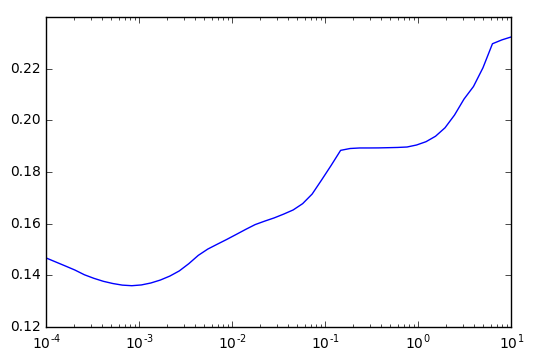

In [15]:
plt.plot(alphas,test_scores)
plt.xscale('log')

In [16]:
print(min(test_scores)) #alpha = 0.000828642772855 0.135937724388

0.135937724388


In [17]:
from sklearn.linear_model import BayesianRidge

In [18]:
clf2 = BayesianRidge()
test_score2 = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))

In [19]:
print(np.mean(test_score2))

0.232261426622


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf2 = LogisticRegression()
test_score3 = np.sqrt(-cross_val_score(clf2,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
print(np.mean(test_score3))

ValueError: Unknown label type: 'continuous'

In [24]:
from sklearn.ensemble import AdaBoostRegressor , RandomForestRegressor

In [25]:
clf1 = ElasticNet(alpha=0.00082)
clf2 = RandomForestRegressor(n_estimators=500,max_features=0.5)
clf3 = AdaBoostRegressor(n_estimators=500)

In [26]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=500, random_state=None)

In [27]:
y_1 = np.exp(clf1.predict(X_test))
y_2 = np.exp(clf2.predict(X_test))
y_3 = np.exp(clf3.predict(X_test))

In [28]:
y_final = (y_1+y_2+y_3)/3

In [29]:
submission_df = pd.DataFrame(data={'Id':test.index,'SalePrice':y_final})

In [30]:
submission_df.head(10)

,Id,SalePrice
0,1461,116224.184800
1,1462,143100.437643
2,1463,171134.089296
3,1464,186961.140482
4,1465,191816.876596
5,1466,170494.929809
6,1467,172987.670966
7,1468,163135.426383
8,1469,184198.117702
9,1470,117339.765448


In [ ]:
submission_df.to_csv('submission_elnet_rf_ada.csv',index=False)

In [31]:
test_score_combined = (np.sqrt(-cross_val_score(clf1,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
+np.sqrt(-cross_val_score(clf2,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
+np.sqrt(-cross_val_score(clf3,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
)/3
print(np.mean(test_score_combined))

0.148630065102


In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
clf4 = PassiveAggressiveRegressor()
clf4.fit(X_train,y_train) 


In [ ]:
y_4 = np.exp(clf4.predict(X_test))
test_score_4 = (np.sqrt(-cross_val_score(clf4,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))
print(np.mean(test_score_4))

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
layers = (np.linspace(1,20,20)*5).astype(int)
print(layers)
test_scores = []
scores_sigma = []
for layer in layers:
    clf = MLPRegressor(early_stopping=True,hidden_layer_sizes=(layer,),max_iter=1000,learning_rate='adaptive',tol=1e-6)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    print(layer,np.mean(test_score))
    test_scores.append(np.mean(test_score))
    scores_sigma.append(np.std(test_score))

In [ ]:
plt.errorbar(layers,test_scores,yerr=scores_sigma,fmt='r+')


In [ ]:
from sklearn.svm import LinearSVR , SVR

In [ ]:
linsvr = LinearSVR()
svr = SVR()

In [ ]:
linsvr.fit(X_train,y_train)
svr.fit(X_train,y_train)

In [ ]:
test_score_svr = (np.sqrt(-cross_val_score(svr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))
test_score_linsvr = (np.sqrt(-cross_val_score(linsvr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))
print(np.mean(test_score_svr))
print(np.mean(test_score_linsvr))

In [ ]:
np.mean(np.sqrt(-cross_val_score(clf3,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
depths = np.linspace(2,5,4).astype(int)
print(depths)
test_scores = []
scores_sigma = []
for depth in depths:
    clf = GradientBoostingRegressor(n_estimators=200,max_depth=depth)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    print(depth,np.mean(test_score))
    test_scores.append(np.mean(test_score))
    scores_sigma.append(np.std(test_score))

[2 3 4 5]
2 0.127225132979
3 0.12397429877
4 0.124800645601
5 0.128914302874


(1, 6)

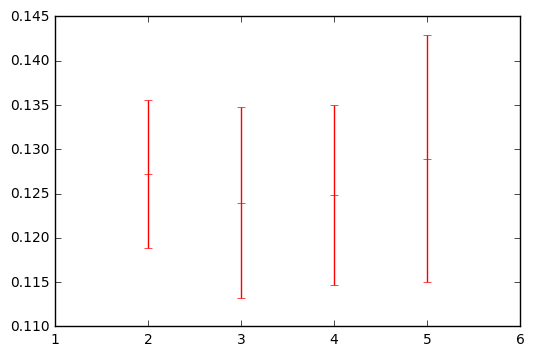

In [34]:
plt.errorbar(depths,test_scores,yerr=scores_sigma,fmt='r+')
plt.xlim(1,6)

In [35]:
clf1 = GradientBoostingRegressor(n_estimators=200,max_depth=3)

clf1.fit(X_train,y_train)

y_gbr1 = np.exp(clf1.predict(X_test))

y_final = (y_gbr1+y_2+y_1)/3
submission_df = pd.DataFrame(data={'Id':test.index,'SalePrice':y_final})

In [36]:
submission_df.to_csv('submission_gbr_rf_elnet.csv',index=False)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(n_estimators=500)
clf.fit(X_train,y_train)

In [ ]:
y_isoforest = np.exp(clf.predict(X_test))

In [ ]:
test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
print(test_score)

In [37]:
from sklearn.kernel_ridge import KernelRidge

In [38]:
alphas = np.linspace(12.7,13.1,20)
test_scores=[]
scores_sigma=[]
#print(alphas)
for alpha in alphas:
    kridge = KernelRidge(alpha)
    test_score = np.sqrt(-cross_val_score(kridge,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    print(alpha,np.mean(test_score))
    test_scores.append(np.mean(test_score))
    scores_sigma.append(np.std(test_score))

12.7 0.139332544862
12.7210526316 0.139332478589
12.7421052632 0.139332417639
12.7631578947 0.139332373569
12.7842105263 0.139332320837
12.8052631579 0.139332276001
12.8263157895 0.139332248399
12.8473684211 0.139332206853
12.8684210526 0.139332181868
12.8894736842 0.139332154683
12.9105263158 0.139332144513
12.9315789474 0.139332130082
12.9526315789 0.13933210781
12.9736842105 0.139332115101
12.9947368421 0.139332114083
13.0157894737 0.139332110175
13.0368421053 0.139332136856
13.0578947368 0.139332148481
13.0789473684 0.139332159097
13.1 0.139332187652


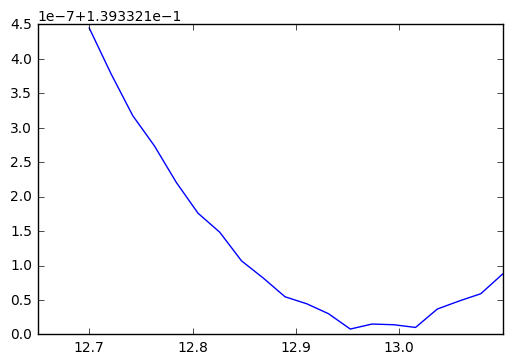

In [39]:
plt.plot(alphas,test_scores)

In [40]:
kridge = KernelRidge(alpha=13)
kridge.fit(X_train,y_train)

KernelRidge(alpha=13, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [41]:
y_kridge = np.exp(kridge.predict(X_test))

In [42]:
test_score = np.sqrt(-cross_val_score(kridge,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
print(test_score)

[ 0.1149361   0.1479854   0.13091994  0.11804804  0.1847711 ]


In [43]:
y_final = (y_kridge+y_gbr1+y_2+y_1)/4
submission_df = pd.DataFrame(data={'Id':test.index,'SalePrice':y_final})

NOCH SUBMITTEN

In [45]:
submission_df.to_csv('submission_kridge_combined_best.csv',index=False) 

evtl noch Lasso und mitteln